# Impute Missing Values

In [2]:
import pandas as pd

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

In [17]:
# Show first few rows
df.head()
df.shape

(65437, 114)

# Step 3. Finding and Removing Duplicates

In [10]:
duplicated_rows = df[df.duplicated()]

In [15]:
unique_values = df.drop_duplicates()
df.shape

(65437, 114)

# Step 4: Finding Missing Values

In [18]:
missing_values = df.isnull().sum()
missing_values

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [20]:
missing_percentage = missing_values * 100 / df.shape[0]
missing_percentage.sort_values(ascending=False)

AINextMuch less integrated    98.245641
AINextLess integrated         96.401119
AINextNo change               80.900714
AINextMuch more integrated    79.464217
EmbeddedAdmired               74.428840
                                ...    
MainBranch                     0.000000
Check                          0.000000
Employment                     0.000000
Age                            0.000000
ResponseId                     0.000000
Length: 114, dtype: float64

In [22]:
any_missing_values = df.isnull().values.any()
any_missing_values

np.True_

# Task 4: Find out how many rows are missing in the column RemoteWork.

In [23]:
# Task 4: Find out how many rows are missing in the column RemoteWork.
RemoteWork_missing = df['RemoteWork'].isnull().sum()
RemoteWork_missing

np.int64(10631)

# Step 5. Imputing Missing Values
#### Find the value counts for the column RemoteWork

In [24]:
RemoteWork_value = df['RemoteWork'].value_counts()
RemoteWork_value

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

# Task 6: Identify the most frequent (majority) value in the RemoteWork column.

In [25]:
freq=df['RemoteWork'].mode()[0]
print(freq)

Hybrid (some remote, some in-person)


In [26]:
df['RemoteWork'] = df['RemoteWork'].fillna(freq)

In [32]:
xx = df['RemoteWork'].isnull().sum()
print(xx)

0


In [33]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [35]:
feq_mean = df['ConvertedCompYearly'].mode()[0]

In [36]:
feq_mean

np.float64(64444.0)

In [37]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(feq_mean)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].astype(int)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64444,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,64444,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,64444,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,64444,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,64444,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64444,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64444,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64444,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,64444,NaN


In [39]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
64444     42323
53703       308
75184       230
85925       226
107406      208
          ...  
46145         1
154440        1
27391         1
11562         1
116844        1
Name: count, Length: 6113, dtype: int64

In [40]:
df = df[df['ConvertedCompYearly']>20000]
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
64444     42323
53703       308
75184       230
85925       226
107406      208
          ...  
85184         1
249000        1
53669         1
23497         1
116844        1
Name: count, Length: 4265, dtype: int64

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Check index after filtering
print("Index after filtering:", sum(list(df.index)))

Index after filtering: 1891955341


In [49]:
df.reset_index(drop=True, inplace=True)
print("Index before filtering:", sum(list(df.index)))

Index before filtering: 1891955341


In [59]:
res = df['ConvertedCompYearly'][1:].value_counts()
print(res)

ConvertedCompYearly
64444     42322
53703       308
75184       230
85925       226
107406      208
          ...  
85184         1
249000        1
53669         1
23497         1
116844        1
Name: count, Length: 4265, dtype: int64


In [78]:
chart_data = {
    'ConvertedCompYearly': list(res.values),
}
chart_df = pd.DataFrame(chart_data)


/var/folders/tv/ccg9r04d74l7pmss8y9glmsm0000gn/T/ipykernel_7373/2215755325.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ConvertedCompYearly', y='count', data=chart_df, palette="viridis")


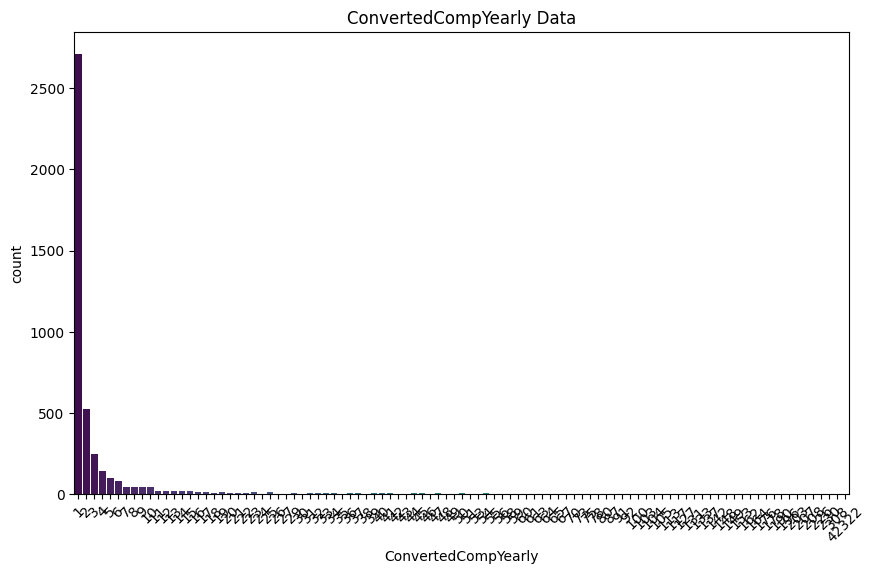

In [76]:
# Example data (replace with your actual data)
data2 = {'ConvertedCompYearly': list(res.values)}
df2 = pd.DataFrame(data2)

# Get value counts and reset index
chart_df = df2['ConvertedCompYearly'].value_counts().reset_index()
chart_df.columns = ['ConvertedCompYearly', 'count']  # Rename columns for clarity

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))  # Set figure size before the plot
sns.barplot(x='ConvertedCompYearly', y='count', data=chart_df, palette="viridis")

# Customize the plot
plt.xlabel('ConvertedCompYearly')
plt.ylabel('count')
plt.title('ConvertedCompYearly Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()